# Imports

In [1]:
# current filepath system leaves plenty to be desired
import sys
local_path = '/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/'
sys.path.insert(0, local_path)

# imports.py in /utils/
from utils.imports import *

# plotting magic
%matplotlib inline
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)
# plt.style.available
# ^^^ show available seaborn styles

# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
from utils.tidy import *
from utils.model import *


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Acquire

In [2]:
# # first run
# url=get_db_url('grocery_db')
# df = pd.read_sql('SELECT * FROM grocery_customers', url)
# df.to_csv('/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/grocery_db.csv',index=False)
# cached
df = pd.read_csv('/Users/hinzlehome/codeup-data-science/anomaly-detection-exercises/csv/grocery_db.csv')

# Prepare

In [3]:
df=df.drop('customer_id',axis=1)

In [4]:
# df=df.astype("float32", copy = False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<AxesSubplot:>

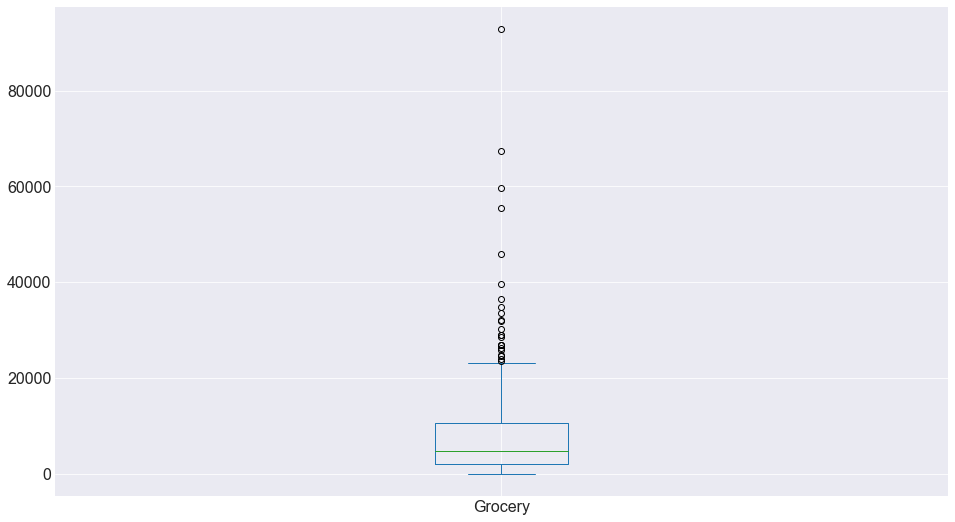

In [7]:
df.Grocery.plot.box()

In [8]:
df = StandardScaler().fit_transform(df)

In [9]:
sns.scatterplot(df.Grocery, df.Fresh)
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'Grocery'

In [ ]:
df.groupby('Region').mean()

In [ ]:
cols=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [ ]:
df=pd.DataFrame(df, columns=cols)

In [ ]:
df.head()

In [ ]:
dbsc = DBSCAN(eps = .75, min_samples = 15).fit(df)

In [ ]:
df['labels'] = dbsc.labels_
df.labels.value_counts()

In [ ]:
df.head()

In [ ]:
merge